In [1]:
import csv 
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import numpy as np

In [2]:
   
def clean(file):
    '''
    Takes .txt files outputed from the stat sampler code in the molecular dynamics project
    and turns them into arrays for analysis
    '''
    data = []
    with open(file) as stat:

        try:
            reader = csv.reader(stat,delimiter = ' ')
            for row in reader:
                data.append(row)
        finally:
            stat.close()
        #probably not the most efficient but i had to convince py that the entries were floats
        for i in range(len(data)):
            for j in range(len(data[i])):
                data[i][j] = float(data[i][j][:])

            
    return data



def getD(datalist,index):

    mr2 = [row[2] for row in datalist[index]]
    time = [row[0] for row in datalist[index]]
    D = np.zeros_like(time)
    #einstein relation for diffusion 
    for k in range(len(mr2)):
        D[k] = mr2[k]/6/time[k]
        
    return np.average(D)



def getT(datalist,index,time):
    temp = [119.735*row[6] for row in datalist[index]]
    
    return temp[time]

In [16]:
#black box wizardry, but doesnt matter i have a list of .txt files now
filelist = glob.glob('*.txt')
datalist =[]
for file in filelist:
    datalist.append(clean(file))
    


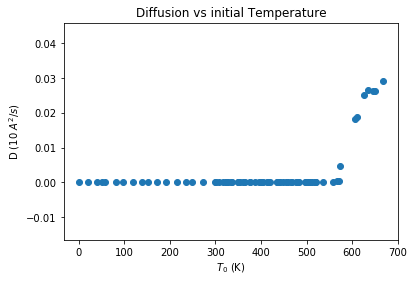

In [5]:
temps1 = []
ds1 = []

for i in range(len(datalist)):
    temps1.append(getT(datalist,i,0))
    ds1.append(getD(datalist,i))
plt.scatter(temps1,ds1)
plt.xlabel('$T_0$ (K)')
plt.ylabel('D (10 $A^2/s$)')
plt.title('Diffusion vs initial Temperature')

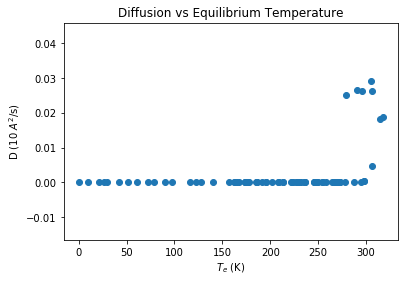

In [6]:
temps2 = []
ds2 = []

for i in range(len(datalist)):
    temps2.append(getT(datalist,i,1000))
    ds2.append(getD(datalist,i))
plt.scatter(temps2,ds2)
plt.xlabel('$T_e$ (K)')
plt.ylabel('D (10 $A^2$/s)')
plt.title('Diffusion vs Equilibrium Temperature')

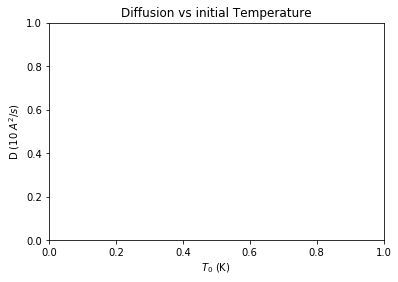

In [13]:
def fullT(datalist,index):
    temp = [119.735*row[6] for row in datalist[index]]
    
    return temp


for i in range(len(datalist)):
    time = [row[0] for row in datalist[i]]
    T0s = [119.735*row[6] for row in datalist[index]]
    plt.plot(T0s,time)
    
    
    
plt.xlabel('$T_0$ (K)')
plt.ylabel('D (10 $A^2/s$)')
plt.title('Diffusion vs initial Temperature')

In [17]:
T0s = [119.735*row[6] for row in datalist[0]]

IndexError: list index out of range